# Project 1 - Investigating No Show Medical Appointments
by Kudakwashe Verah

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> In this dataset, we will be assessing data from around 100,000 medical appointments where some patients did not attend their appointments. In light of this, we will be looking at the factors that we should know so we can better predict potential 'No-Show' patients. The dataset has 14 variables and we will be assessing 3 of those variables.
>
> The most important variable that we are interested in, is the __'NoShow'__ variable, which indicates whether or not the patient showed up for their scheduled appointment. The descriptions for the __'NoShow'__ variable are as follows: 'No' means the patient showed up for their appointment and 'Yes' means the patient did not show up for their appointment. For a more detailed description of the variables in this dataset, please click the link below: 
><ul>
></ul><li><a href="#variables">Variable Descriptions</a></li>
></ul>
>


> To answer the question of what factors are important for us to know so that we can better predict the likelihood of a patient showing up for their booked appointment, we will focus on 4 variables within this dataset. We will analyse whether the _age_ of the patient is a factor in the patient showing up for their apartment. We will also try to determine if the _gender_ of the patient is factor in them showing up for their appointment. Lastly, we will also try to determine if patients who are on the _scholarship (welfare program)_ will show up for their appointments more or less than those who aren't on it.

In [1]:
"""
Importing all the libraries that we will use in investigating this dataset.
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
    
%matplotlib inline

In [2]:
# setting a style for the plots
sns.set_style('darkgrid')

<a id='wrangling'></a>
## Data Wrangling

> In this section of the report, we will load in the data and check for cleanliness by looking at some information about the variables. We will then clean and trim the dataset for analysis.

### General Properties

In [3]:
"""
Loading the 'No Show Appointments' dataset.
"""


def load_data():
    df = pd.read_csv(r"C:\Users\kvera\OneDrive - University of Pretoria\Documents\Online Courses\Udacity\Data Analyst Nanodegree\Project Files\Project 1\Dataset Files\noshowappointments-kagglev2-may-2016.csv")
    return df

if __name__ == '__main__':
    df = load_data()

# check the first few rows of data to get a picture of what the dataset looks like    
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
"""
We will be renaming some of the columns to maintain uniformity in the column names and correct the spelling errors.
"""

# creating a dictionary storing the new column names
dict = {'PatientId':'PatientID', 'Hipertension': 'Hypertension', 'Handcap': 'Handicap', 'SMS_received': 'SMSReceived', 'No-show':'NoShow'}

# renaming the columns using the above dictionary
df.rename(columns = dict, inplace=True)

df.head(1)

,PatientID,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,NoShow
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


<a id='variables'></a>

#### Variable Descriptions
> A number of characteristics about the patient are included in each row, below are the descriptions of each column:
>
> - __PatientID:__ Identification of a patient.
> - __AppointmentID:__ Identification of each appointment.
> - __Gender:__ Male or Female?
> - __ScheduleDay:__ Tells us on what day the patient set up their appointment.
> - __AppointmentDay:__ The day of the actual appointment.
> - __Age:__ How old is the patient?
> - __Neighbourhood:__ Indicates the location of the hospital.
> - __Scholarship:__ Indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família, (0 means 'No' and 1 means 'Yes')
> - __Hypertension:__ Indicates whether or not the patient has Hypertension, (0 means 'No' and 1 means 'Yes').
> - __Diabetes:__ Indicates whether or not the patient has Diabetes, (0 means 'No' and 1 means 'Yes').
> - __Alcoholism:__ Indicates whether or not the patient drinks alcohol, (0 means 'No' and 1 means 'Yes').
> - __Handicap:__ Indicates whether or not the patient is handicapped, (0 means 'No' and 1 means 'Yes').
> - __SMSReceived:__ Indicates whether or not 1 or more messages were sent to the patient, (0 means 'No' and 1 means 'Yes').
> - __NoShow:__ Indicates whether or not the patient came for their appointment, ( ‘No’ means the patient showed up to their appointment, and ‘Yes’ if they did not show up).

In [5]:
"""
This function allows us to know how many rows and columns this dataset has.
"""

df.shape

(110527, 14)

In [6]:
"""
This functions gives us a summary of the dataset and the data types within it.
"""

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientID       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hypertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handicap        110527 non-null  int64  
 12  SMSReceived     110527 non-null  int64  
 13  NoShow          110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [7]:
"""
This functions provides a statistical summary of the dataset's variables.
"""

df.describe()

,PatientID,AppointmentID,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


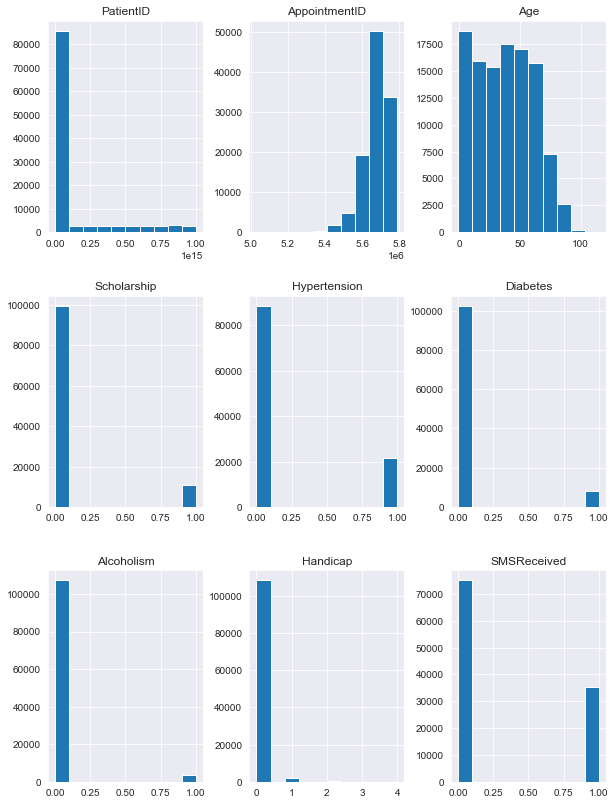

In [8]:
"""
We are plotting histograms for the variables so that we can have an
idea of the how the data values look.
"""

df.hist(figsize=(10, 14));

In [9]:
"""
Counting how many patients fulfilled their appointments and how many did not.
"""

df.value_counts('NoShow')

NoShow
No     88208
Yes    22319
dtype: int64

In [10]:
"""
Checking for any duplicates in this dataset.
"""

sum(df.duplicated())

0

In [11]:
"""
Checking the amount of unique values in this dataset.
"""

df.nunique()

PatientID          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hypertension           2
Diabetes               2
Alcoholism             2
Handicap               5
SMSReceived            2
NoShow                 2
dtype: int64

In [12]:
"""
Checking for null values in this dataset.
"""

df.isnull().sum()

PatientID         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hypertension      0
Diabetes          0
Alcoholism        0
Handicap          0
SMSReceived       0
NoShow            0
dtype: int64

In [13]:
"""
This functions allows us to see the number of patients who are either male or female for future exploration.
"""

df.value_counts('Gender')

Gender
F    71840
M    38687
dtype: int64

### Data Cleaning
> To understand the general properties of the dataset, we performed some preliminary data wrangling. Through this wrangling, we observed that the data has _no null values and no duplicate values._ As such, we do not need to drop nor replace any missing values in the dataset. We will, however, be dropping the following variables as we will not require them for our analysis: __'PatientID', 'AppointmentID', 'ScheduledDay', 'AppointmentDay' and 'Neighbourhood'.__
>
> We are interested in the following variables for our analysis: __'Gender', 'Scholarship' and 'Age'.__ Do these factors influence whether or not a patient will show up for their appointment? We will keep the set values for the __'Gender'__ variable as they are easier to understand for this variable than using binary values like with the __'Diabetes'__ variable for example.
>
> Lastly, we will drop the age value of -1 as it is not a valid age and also create categories (bins) for the different age groups under the __'Age'__ variable so that we can infer whether or not the patient's age is a factor in them showing up for their appointment.

In [14]:
"""
In this cell, we are dropping the columns that we do not need for this analysis as well as the invalid age of -1.
"""

# creating a list of the columns to be dropped from the dataset
columns_to_drop = ['PatientID', 'AppointmentID', 'ScheduledDay', 'AppointmentDay', 'Neighbourhood']
df.drop(columns_to_drop, axis=1, inplace=True)

In [15]:
# find the index of the -1 value
df.query('Age == -1')

,Gender,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,NoShow
99832,F,-1,0,0,0,0,0,0,No


In [16]:
# drop the -1 value by using its indice
df = df.drop(df.index[99832])

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   Gender        110526 non-null  object
 1   Age           110526 non-null  int64 
 2   Scholarship   110526 non-null  int64 
 3   Hypertension  110526 non-null  int64 
 4   Diabetes      110526 non-null  int64 
 5   Alcoholism    110526 non-null  int64 
 6   Handicap      110526 non-null  int64 
 7   SMSReceived   110526 non-null  int64 
 8   NoShow        110526 non-null  object
dtypes: int64(7), object(2)
memory usage: 8.4+ MB


<a id='eda'></a>
## Exploratory Data Analysis
> As we have cleaned the data, we will now proceed to the exploration of the dataset so as to answer our previously proposed questions. In order for our EDA to be systematic, we will analyse one variable at a time and then assess any correlations between the variables themselves. To do this, we are going to compare the __'NoShow'__ variable to each of the three variables we are focusing on - __'Gender', 'Scholarship' and 'Age'__. We will then analyse the relationships between the three independent variables.

### Question 1 - Do female patients show up for their appointments more than the males do?

In [17]:
"""
To answer this question, we will compare the percentage of females who showed up for their appointment
against the percentage of males who also showed up for their appointment.

We will then use pie charts to compare the attendance of the males against the females in this dataset.
"""

# determining the categories for the pie chart
df.groupby(['NoShow', 'Gender']).size()

NoShow  Gender
No      F         57245
        M         30962
Yes     F         14594
        M          7725
dtype: int64

In [18]:
"""
In the cell below, we will be comparing the percentage of males and females who showed up for their appointment.
"""
# total patients grouped by gender
total_females = 71840
total_males = 38687

# total patients who showed up for their appointments grouped by gender
total_females_show = 57245
total_males_show = 30962

# percentage of patients who showed up for their appointments by gender
females_perc_show = (total_females_show/total_females) * 100
males_perc_show = (total_males_show/total_males) * 100

# printing the percentage of the proportions for a clearer image
print(females_perc_show, males_perc_show)

79.68402004454343 80.03205211052808


In [19]:
"""
Below, we are calculating the percentage difference between the males and females who showed up for their appointment.
"""

def perc_dif(females_perc_show, males_perc_show):
    dif = abs(females_perc_show - males_perc_show)
    return dif

print(perc_dif(females_perc_show, males_perc_show))

0.3480320659846541


In [20]:
"""
These following functions allow us to create pie charts for us to
assess the differences in the attendances visually.
"""

# plotting function
# we will plot the pie charts for males and females and we'll start with the females
def plot_pie_gender_female(females_perc_show):
    labels = 'Female Show', 'Female No-Show'
    cut_points = [57245, 14594]
    colours = ['blue', 'lightgreen']

    # piechart title and axis
    fig1, ax = plt.subplots()
    ax.pie(cut_points, labels = labels, colors = colours, autopct = '%1.7f%%')
    plt.title("Percentage of Female Patients' Attendance", fontsize = 16)

    # the equal aspect ratio ensures that pie is drawn as a circle.
    ax.axis('equal')
    # showing the plot
    plt.show(1)
    
    return plot_pie_gender_female

# pie chart for the male patients
def plot_pie_gender_male(males_perc_show):
    labels = 'Male Show', 'Male No-Show'
    cut_points = [30962, 7725]
    colours = ['blue', 'lightgreen']

    # piechart title and axis
    fig1, ax = plt.subplots()
    ax.pie(cut_points, labels = labels, colors = colours, autopct = '%1.7f%%')
    plt.title("Percentage of Male Patients' Attendance", fontsize = 16)

    # the equal aspect ratio ensures that pie is drawn as a circle.
    ax.axis('equal')
    # show the plot
    plt.show(2)
    
    return plot_pie_gender_male

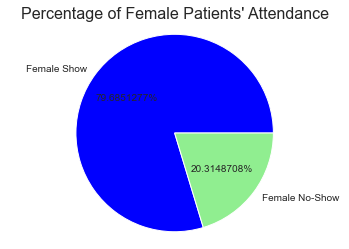

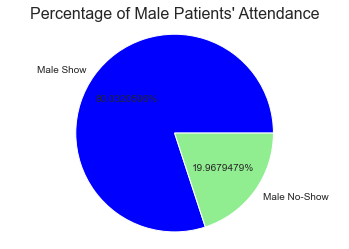

In [21]:
plot_pie_gender_female(females_perc_show), plot_pie_gender_male(males_perc_show);

#### Question 1 Answer
> From the above data and the pie charts, we can see that __79.6851277%__ of the _female_ patients showed up for their apointment whilst __80.0320506%__ of the _male_ patients showed up for theirs. The difference between the males' and females' attendance is __0.3480321%__. This small difference between the genders' attendance indicates that there is insufficient data to determine whether or not the gender of a patient is a factor in them showing up for their appointment. Albeit, it is important to note that this dataset has __29.9953857%__ _less males than females._

### Question 2 - Does being enrolled in the Brasilian welfare program influence if a patient will show up for their apointment?

In [22]:
"""
To answer this question, we will plot a histogram to show the differences between those on the welfare program and those who aren't.
"""

df.groupby(['NoShow', 'Scholarship']).size()

NoShow  Scholarship
No      0              79924
        1               8283
Yes     0              19741
        1               2578
dtype: int64

In [23]:
"""
This functions allows use to see the number of patients who are either on the welfare program or who aren't.
"""

df.value_counts("Scholarship")

Scholarship
0    99665
1    10861
dtype: int64

In [24]:
"""
In the cell below, we will be comparing the percentage of those on the welfare program who showed up for 
their appointments and those who aren't on the welfare program who also showed up for their appointments.

We will then use a histogram to compare the attendance of those on the welfare program and those who aren't.
"""
# total patients grouped by scholarship
total_scholarship = 10861
total_no_scholarship = 99665

# total patients who showed up for their appointments grouped by scholarship
total_scholarship_show = 8283
total_no_scholarship_show = 79924

# the percentage of patients who showed up for their appointments by scholarship
scholarship_perc_show = (total_scholarship_show/total_scholarship) * 100
no_scholarship_perc_show = (total_no_scholarship_show/total_no_scholarship) * 100

# printing the percentage of the proportions for a clearer image
print(scholarship_perc_show, no_scholarship_perc_show)

76.26369579228432 80.19264536196258


In [25]:
"""
Below, we are calculating the percentage difference between the 
patients with and without scholarships who showed up for their appointment.
"""

def perc_dif_schol(scholarship_perc_show, no_scholarship_perc_show):
    dif_schol = abs(scholarship_perc_show - no_scholarship_perc_show)
    return dif_schol

print(perc_dif_schol(scholarship_perc_show, no_scholarship_perc_show))

3.9289495696782524


In [26]:
"""
The following functions allow us to plot a bar chart so that we can see the 
differences visually.
"""
schol_no_show = df.groupby(['Scholarship','NoShow']).size().unstack(fill_value=0)

# plot_barh function
def plot_bar_schol_no_show(schol_no_show):
    schol_no_show.plot.bar()

    # Set titles and axes
    plt.title('Patients Grouped by Scholarship', fontsize = 20)
    plt.xlabel('Scholarship', fontsize=16)
    plt.ylabel('Number of Patients', fontsize=16)

    # use the magic word to show the bar graph
    plt.show()
    
    return plot_bar_schol_no_show

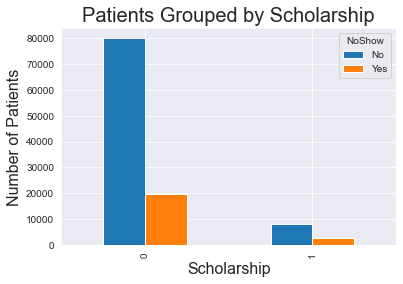

<function plot_bar_schol_no_show at 0x0000023141F63EE0>


In [27]:
print(plot_bar_schol_no_show(schol_no_show));

#### Question 2 Answer
> From the data above, we can see that __76.2636958%__ of patients _with the scholarship showed up_ for their appointments whislt __80.1926454%__ of patients _without the scholarship showed up_ for their appointments. There is a difference of __3.9289496%__ between those with the scholarship and those without who showed up for their appointment.
>
> Based on the data and bar graph, we can infer that _having the scholarship does not influence if a patient will show up for their appointment._

### Question 3 - Does the age of the patient influence whether or not they will show up for their appointment?

In [28]:
"""
This function allows us to create bins for the 'Age' variable.
"""

# creating bins for the 'Age' variable
bins = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110]
labels = ['Child','Teen','YoungAdult','40s','50s', 'Retirees', '70s', '80s', 'Seniors', 'Centurions']
df['AgeBin'] = pd.cut(df['Age'], bins = bins, labels = labels, include_lowest = True)

print(pd.value_counts(df['AgeBin'], sort = False))

Child         14373
Teen          13783
YoungAdult    15052
40s           14420
50s           15661
Retirees      11189
70s            5721
80s            2544
Seniors         301
Centurions        2
Name: AgeBin, dtype: int64


In [29]:
"""
This function allows us to see the distribution of the 'NoShow' variable under the 'AgeBin' column.
"""

df.groupby(['NoShow', 'AgeBin']).size()

NoShow  AgeBin    
No      Child         10761
        Teen          10389
        YoungAdult    11820
        40s           11550
        50s           12940
        Retirees       9541
        70s            4832
        80s            2137
        Seniors         242
        Centurions        2
Yes     Child          3612
        Teen           3394
        YoungAdult     3232
        40s            2870
        50s            2721
        Retirees       1648
        70s             889
        80s             407
        Seniors          59
        Centurions        0
dtype: int64

In [30]:
"""
The following function allows us to plot a histogram displaying 
which age groups have the highest attendance for their appointments. 
"""

# define new labels
labels = np.concatenate(((labels, [labels[9]])))

# Plot the histogram and set the xtick properties
def plot_hist_age(df):
    plot_hist_age = df['Age'].plot(kind = 'hist', bins = bins, 
                                   align ='right', color = 'purple', 
                                   edgecolor = 'black');

    # Set histogram labels and titles
    plt.xlabel('Age Group', fontsize = 16)
    plt.ylabel('Number of Patients', fontsize = 16)
    plt.title('Number of "NoShow" Patients by Age Group', fontsize = 18)
    plt.xlim([0, 120])
    
    plot_hist_age.set_xticks(bins)
    plot_hist_age.set_xticklabels(labels, rotation = 60)

    # use the magic word to show the bar graph
    plt.show()
    
    return plot_hist_age

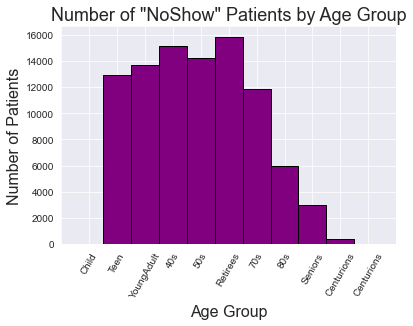

AxesSubplot(0.125,0.125;0.775x0.755)


In [31]:
print(plot_hist_age(df));

#### Question 3 Answer
> Looking at the above data, we can see that the patients in the categories from the __50s and below__ have the highest attendance for their appointments, with the __50s__ category having the highest attendance of __12,940__. The category with the lowest attendance for their appointments is __Centurions__ with a value of __2__.

<a id='conclusions'></a>
## Conclusions

> We looked at three variable - __'Age', 'Gender' and 'Scholarship'.__ We determined that neither age nor gender influence patients in showing up for their appointments. Logically, we can infer that factors that severely affect a patient's health are a much greater driving force in ensuring that the patient shows up for their appointment.
>
> We compared the __'Age' and 'Gender'__ variables against the __'NoShow'__ variable seperately. We observed that approximately _80% of both male and female patients showed up_ for their patients, with a _difference of 0.3% between them._ This dataset also had _29% more females than males_, which could be a possible limitation as it does not provide an equal representation based on the sample sizes. 
> The investigation with the __'Age'__ variable against the __'NoShow'__ highlighted that the categories from the _50s and below have the highest attendance for their appointments_, with the _50s category having the highest attendance of 12,940_. The category with the lowest attendance for their appointments is _Centurions with a value of 2_.
>
> A limitation to this dataset is there not being information on the distance to the hospital from the patient's place of residence. Several factors such as travel costs or even bad weather could influence the patient's ability to show up for their appointment. Although weather may not be a major factor, but as Brazil is located in the Amazon area, natural phenomena such as heavy rains, flooding and landslides could affect several patients within a particular region. All these factors, although miniscule, can skew the data to a degree.
>
> In conclusion, not enough information was provided to illustrate whether the gender of a patient affect them showing up for their appointment. The age group of the patient does affect if the patient will show up as we observed.